<a href="https://colab.research.google.com/github/Tinh0208/app_xemphim/blob/master/bao_cao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.utils import to_categorical, img_to_array, load_img

In [ ]:
!unzip /content/drive/MyDrive/do_an_deeplearning/Data.zip -d.

Archive:  /content/drive/MyDrive/do_an_deeplearning/Data.zip
   creating: ./Data/Test/Bicycle/
  inflating: ./Data/Test/Bicycle/bicycle_1.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_10.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_100.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_101.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_102.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_103.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_104.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_105.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_106.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_107.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_108.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_109.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_11.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_110.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_111.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_112.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_113.jpg  
  inflating: ./Data/Test/Bicycle/bicycle_1

In [ ]:
BASE_PATH = "Data"
TRAIN_PATH = 'Train'
VALID_PATH = 'Valid'
TEST_PATH = 'Train'
CLASSES = ['Bicycle', 'Car','Pedestrain','Motorbike']
IMG_PATH1 = Path.cwd() / BASE_PATH / TEST_PATH /  'Bicycle/bicycle_1.jpg'
# IMG_PATH2 = Path.cwd() / BASE_PATH / TEST_PATH / 'dog/dog.4001.jpg'
IMG_SIZE = (224,224)

In [ ]:
IMG_PATH1

PosixPath('/content/Data/Train/Bicycle/bicycle_1.jpg')

35363/35363 [==============================] - 0s 0us/step


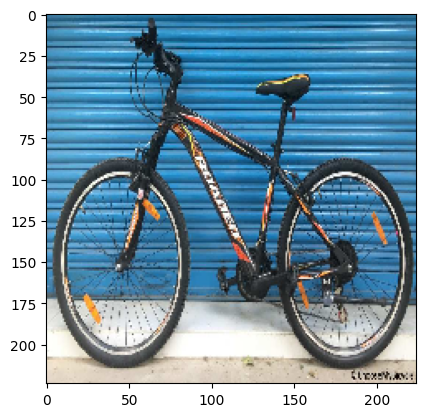

In [ ]:
#Buoc 1 : load model VGG 16
model = VGG16(weights='imagenet',include_top = True)

#Buoc 2: Load anh + tiền xử lí ảnh
#2.1 Load ảnh
img = load_img(IMG_PATH1,color_mode='rgb',target_size=IMG_SIZE)

#2.2 Tiền xử lý ảnh
x = img_to_array(img) # chuyển ảnh về numpy
x = preprocess_input(x) # tiền xử lí ảnh
''' print(x)
print('-'*20) '''
x = np.expand_dims(x,0) # thêm chiều batch
''' print(x) '''
#2.3 GỌi hàm predict
predictions = model.predict(x)

#2.4 Lấy thông tin dự đoán (class,description,probability)
decodes = decode_predictions(predictions,top = 3)
#2.5 Xuất tên lớp
plt.imshow(img)

In [ ]:
decodes

[[('n03792782', 'mountain_bike', 0.56247765),
  ('n03891332', 'parking_meter', 0.07518962),
  ('n03127747', 'crash_helmet', 0.055446774)]]